In [1]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv(r'C:\Users\Admin\Desktop\Project\movies.csv') #change that path yourself


In [52]:
# Now let's take a look at the data

df.head()

name  rating  genre  year  released  score      votes  director  writer  \
0  4692       6      6  1980      1304    8.4   927000.0      1795    2832   
1  3929       6      1  1980      1127    5.8    65000.0      1578    1158   
2  3641       4      0  1980      1359    8.7  1200000.0       757    1818   
3   204       4      4  1980      1127    7.7   221000.0       889    1413   
4   732       6      4  1980      1170    7.3   108000.0       719     351   

   star  country    budget      gross  company  runtime  yearcorrect  Year  
0   699       46  19000000   46998772     1426    146.0         1980  1980  
1   214       47   4500000   58853106      452    104.0         1980  1980  
2  1157       47  18000000  538375067      945    124.0         1980  1980  
3  1474       47   3500000   83453539     1108     88.0         1980  1980  
4   271       47   6000000   39846344     1083     98.0         1980  1980

In [3]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [4]:
# There is exist missing data in dataset so let's drop all rows that have missing data
df = df.dropna()

In [6]:
#check again

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 0%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%


In [7]:
# Data Types for our columns

print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [8]:
#change data type for of columns

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [44]:
df.head()

name  rating  genre  year  released  score      votes  director  writer  \
0  4692       6      6  1980      1304    8.4   927000.0      1795    2832   
1  3929       6      1  1980      1127    5.8    65000.0      1578    1158   
2  3641       4      0  1980      1359    8.7  1200000.0       757    1818   
3   204       4      4  1980      1127    7.7   221000.0       889    1413   
4   732       6      4  1980      1170    7.3   108000.0       719     351   

   star  country    budget      gross  company  runtime  yearcorrect  Year  
0   699       46  19000000   46998772     1426    146.0         1980  1980  
1   214       47   4500000   58853106      452    104.0         1980  1980  
2  1157       47  18000000  538375067      945    124.0         1980  1980  
3  1474       47   3500000   83453539     1108     88.0         1980  1980  
4   271       47   6000000   39846344     1083     98.0         1980  1980

In [13]:
# create correct year column
df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

In [14]:
df.sort_values(by=['gross'], inplace=False, ascending=False)

name     rating   genre  year  \
5445                                      Avatar      PG-13  Action  2009   
7445                           Avengers: Endgame      PG-13  Action  2019   
3045                                     Titanic      PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens      PG-13  Action  2015   
7244                      Avengers: Infinity War      PG-13  Action  2018   
...                                          ...        ...     ...   ...   
5640                                 Tanner Hall          R   Drama  2009   
2434                  Philadelphia Experiment II      PG-13  Action  1993   
3681                                Ginger Snaps  Not Rated   Drama  2000   
272                                     Parasite          R  Horror  1982   
3203                                  Trojan War      PG-13  Comedy  1997   

                               released  score      votes  \
5445  December 18, 2009 (United States)    7.8  1100000.0   
7445     April 26, 2019 (United States)    8.4   903000.0   
3045  December 19, 1997 (United States)    7.8  1100000.0   
6663  December 18, 2015 (United States)    7.8   876000.0   
7244     April 27, 2018 (United States)    8.4   897000.0   
...                                 ...    ...        ...   
5640          January 15, 2015 (Sweden)    5.8     3500.0   
2434         June 4, 1994 (South Korea)    4.5     1900.0   
3681              May 11, 2001 (Canada)    6.8    43000.0   
272      March 12, 1982 (United States)    3.9     2300.0   
3203           October 1, 1997 (Brazil)    5.7     5800.0   

                 director                   writer               star  \
5445        James Cameron            James Cameron    Sam Worthington   
7445        Anthony Russo       Christopher Markus  Robert Downey Jr.   
3045        James Cameron            James Cameron  Leonardo DiCaprio   
6663          J.J. Abrams          Lawrence Kasdan       Daisy Ridley   
7244        Anthony Russo       Christopher Markus  Robert Downey Jr.   
...                   ...                      ...                ...   
5640  Francesca Gregorini  Tatiana von Fürstenberg        Rooney Mara   
2434     Stephen Cornwell       Wallace C. Bennett       Brad Johnson   
3681         John Fawcett             Karen Walton      Emily Perkins   
272          Charles Band            Alan J. Adler    Robert Glaudini   
3203         George Huang                Andy Burg       Will Friedle   

            country     budget       gross                    company  \
5445  United States  237000000  2847246203      Twentieth Century Fox   
7445  United States  356000000  2797501328             Marvel Studios   
3045  United States  200000000  2201647264      Twentieth Century Fox   
6663  United States  245000000  2069521700                  Lucasfilm   
7244  United States  321000000  2048359754             Marvel Studios   
...             ...        ...         ...                        ...   
5640  United States    3000000        5073           Two Prong Lesson   
2434  United States    5000000        2970           Trimark Pictures   
3681         Canada    5000000        2554  Copperheart Entertainment   
272   United States     800000        2270           Embassy Pictures   
3203  United States   15000000         309                   Daybreak   

      runtime  yearcorrect  
5445    162.0         2009  
7445    181.0         2019  
3045    194.0         1997  
6663    138.0         2015  
7244    149.0         2018  
...       ...          ...  
5640     96.0         2015  
2434     97.0         1994  
3681    108.0         2001  
272      85.0         1982  
3203     85.0         1997  

[5421 rows x 16 columns]

In [15]:
pd.set_option('display.max_rows', None)

<Axes: >

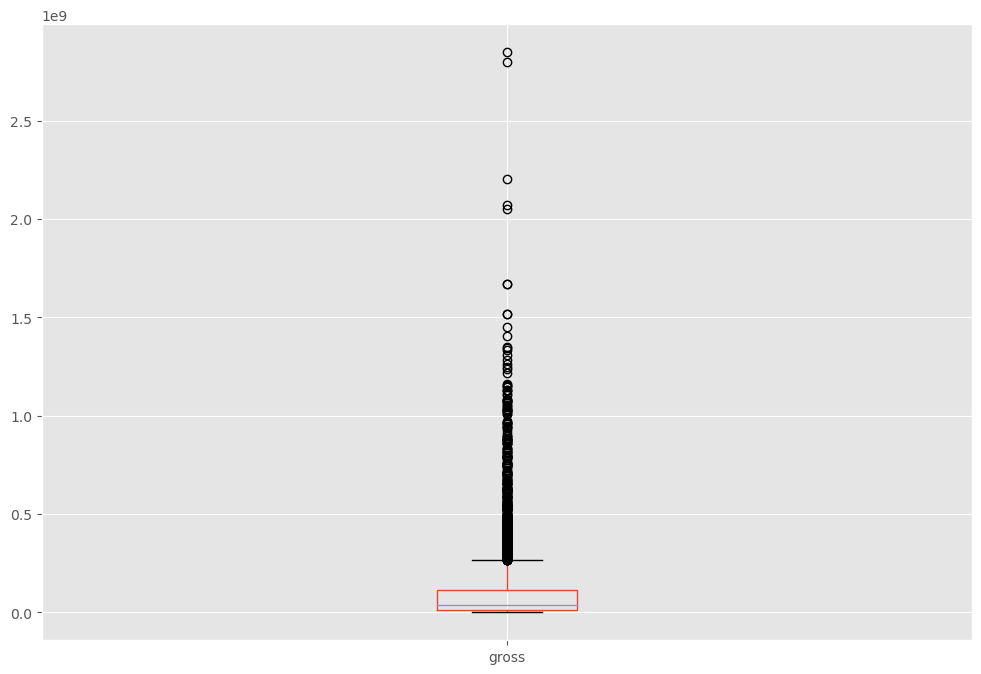

In [16]:
# Are there any Outliers?

df.boxplot(column=['gross'])

In [17]:
df.drop_duplicates()

name     rating      genre  \
0                                           The Shining          R      Drama   
1                                       The Blue Lagoon          R  Adventure   
2        Star Wars: Episode V - The Empire Strikes Back         PG     Action   
3                                             Airplane!         PG     Comedy   
4                                            Caddyshack          R     Comedy   
5                                       Friday the 13th          R     Horror   
6                                    The Blues Brothers          R     Action   
7                                           Raging Bull          R  Biography   
8                                           Superman II         PG     Action   
9                                       The Long Riders          R  Biography   
10                                Any Which Way You Can         PG     Action   
11                               The Gods Must Be Crazy         PG  Adventure   
12                                               Popeye         PG  Adventure   
13                                      Ordinary People          R      Drama   
14                                      Dressed to Kill          R      Crime   
15                                    Somewhere in Time         PG      Drama   
17                                               9 to 5         PG     Comedy   
18                                              The Fog          R     Horror   
20                                             Cruising          R      Crime   
21                                        Heaven's Gate          R  Adventure   
22                                  The Final Countdown         PG     Action   
23                                               Xanadu         PG    Fantasy   
28                                             Brubaker          R      Crime   
29                                      American Gigolo          R      Crime   
33                     Cattle Annie and Little Britches         PG      Drama   
35                                     Private Benjamin          R     Comedy   
36                                The Hollywood Knights          R     Comedy   
37                                           Motel Hell          R     Comedy   
42                                        The Stunt Man          R     Action   
46                                           The Island          R     Action   
48                                        The Nude Bomb         PG     Action   
50                                    Stardust Memories         PG     Comedy   
51                                    Melvin and Howard          R     Comedy   
53                                         Bronco Billy         PG     Action   
56                                 When Time Ran Out...         PG     Action   
57                                      Oh Heavenly Dog         PG     Comedy   
58                                          The Octagon          R     Action   
75                        The Last Flight of Noah's Ark          G  Adventure   
77                                        Willie & Phil          R     Comedy   
80                                               Phobia          R      Drama   
92        Indiana Jones and the Raiders of the Lost Ark         PG     Action   
94                       An American Werewolf in London          R     Comedy   
95                                 Escape from New York          R     Action   
96                                        The Evil Dead      NC-17     Horror   
97                                              Porky's          R     Comedy   
98                                             Blow Out          R      Crime   
99                                  Clash of the Titans         PG     Action   
100                                           Excalibur          R  Adventure   
101                                           Mad Max 2          R     Action   
1

In [18]:
# Budget high correlation
# Company high correlation

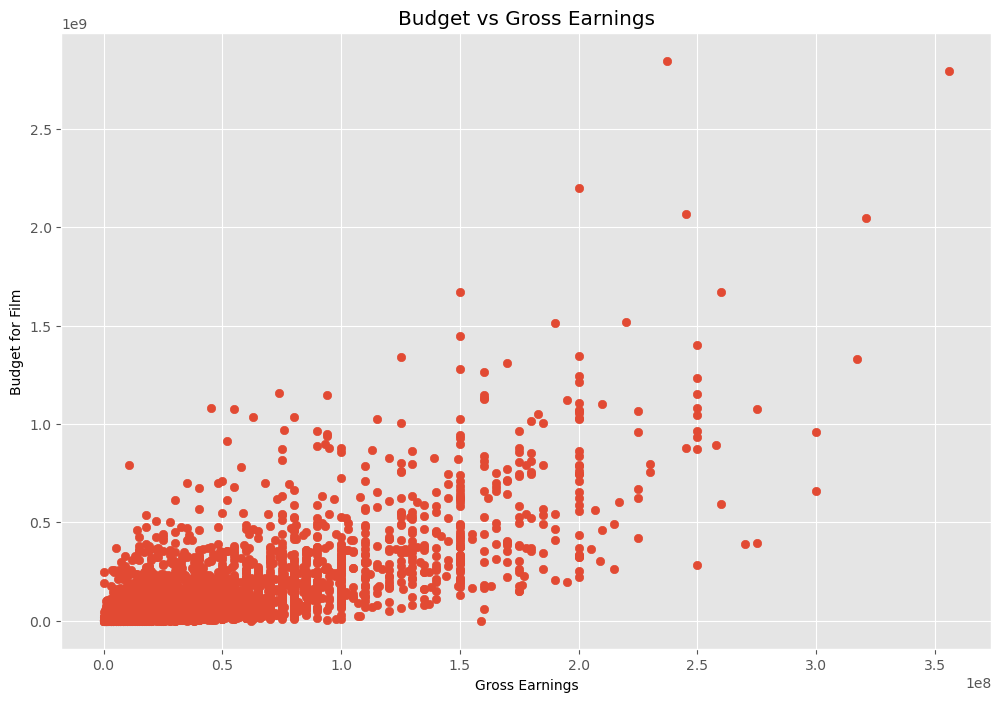

In [19]:
# Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

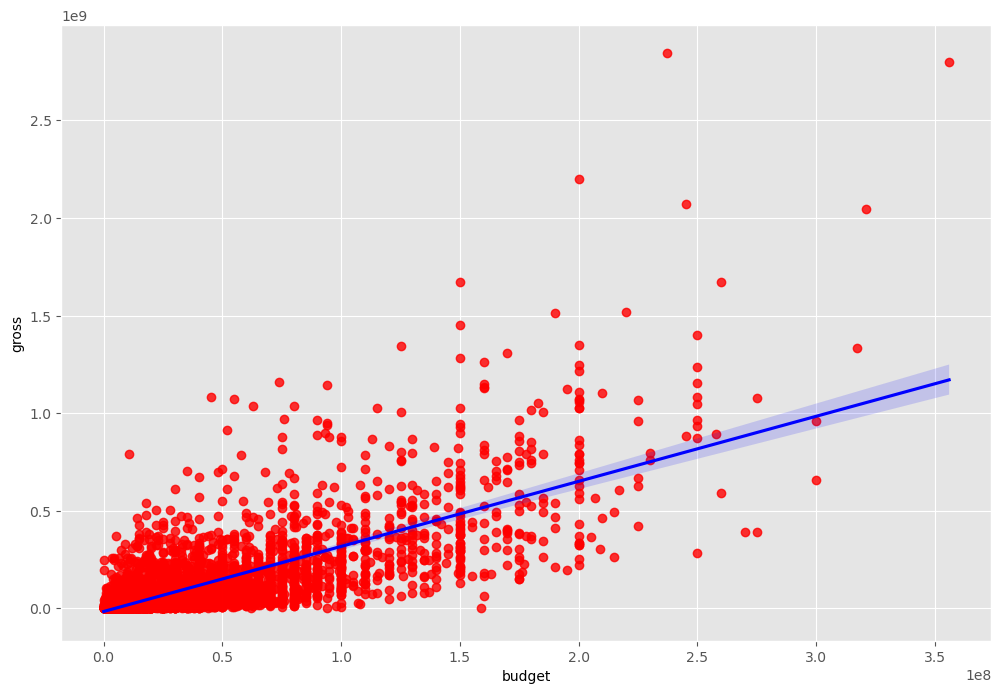

In [20]:
#Plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})

<Axes: xlabel='gross', ylabel='budget'>

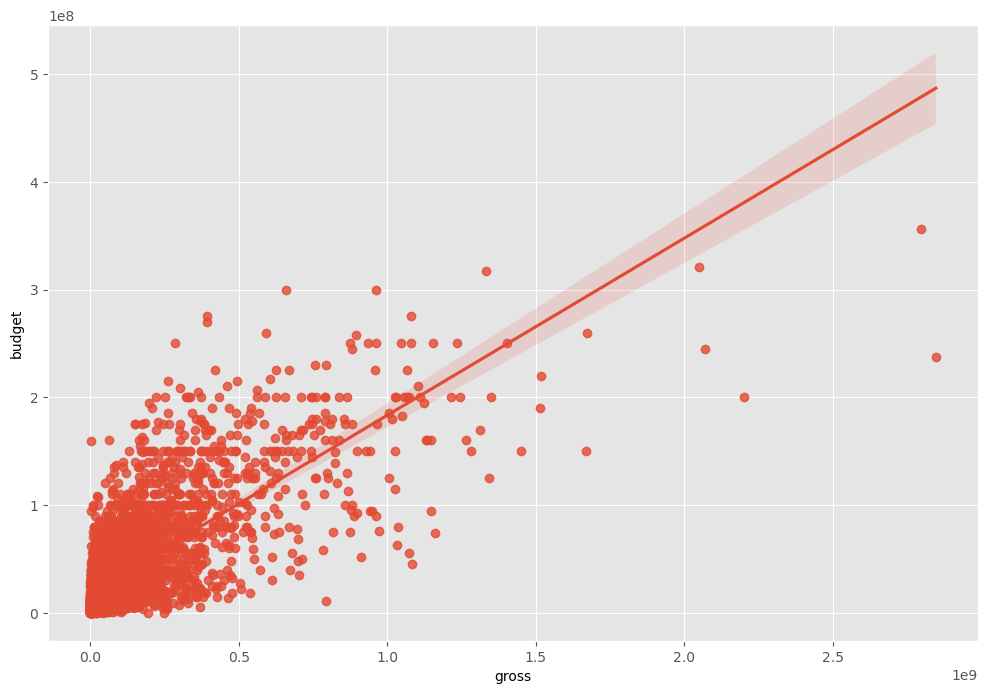

In [21]:
sns.regplot(x="gross", y="budget", data=df)

<Axes: xlabel='score', ylabel='gross'>

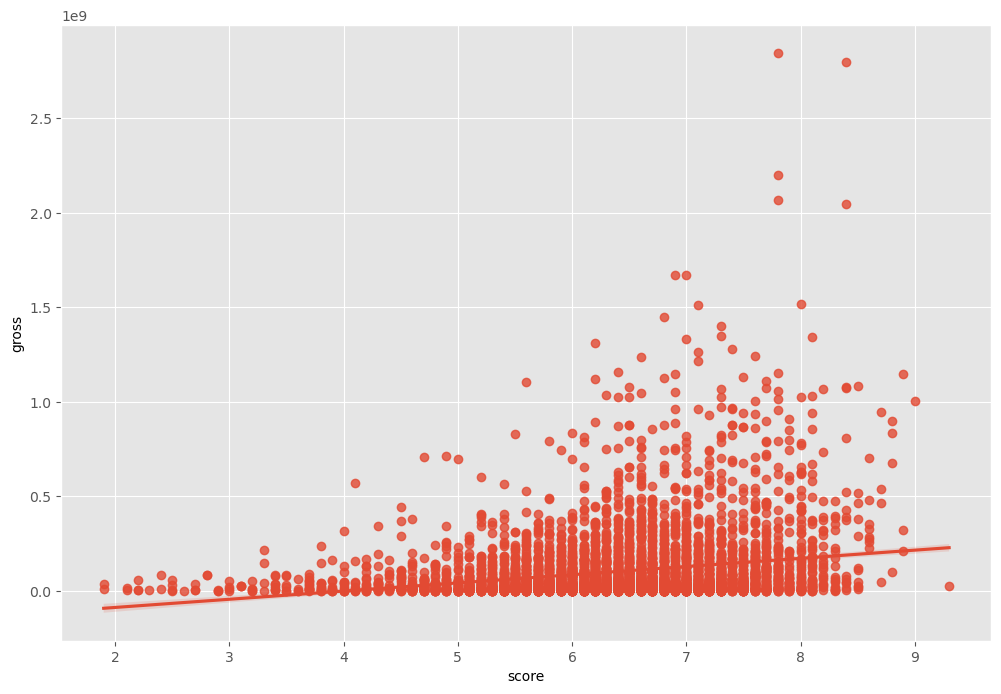

In [22]:
sns.regplot(x="score", y="gross", data=df)

In [23]:
# Correlation Matrix between all numeric columns

df.corr(method ='pearson')

C:\Users\Admin\AppData\Local\Temp\ipykernel_11876\2805906452.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method ='pearson')


year     score     votes    budget     gross   runtime  \
year         1.000000  0.056386  0.206021  0.327722  0.274321  0.075077   
score        0.056386  1.000000  0.474256  0.072001  0.222556  0.414068   
votes        0.206021  0.474256  1.000000  0.439675  0.614751  0.352303   
budget       0.327722  0.072001  0.439675  1.000000  0.740247  0.318695   
gross        0.274321  0.222556  0.614751  0.740247  1.000000  0.275796   
runtime      0.075077  0.414068  0.352303  0.318695  0.275796  1.000000   
yearcorrect  0.998726  0.061923  0.203098  0.320312  0.268721  0.075294   

             yearcorrect  
year            0.998726  
score           0.061923  
votes           0.203098  
budget          0.320312  
gross           0.268721  
runtime         0.075294  
yearcorrect     1.000000

In [48]:
df.corr(method ='kendall')

name    rating     genre      year  released     score  \
name         1.000000 -0.017023  0.005970  0.018614 -0.004104  0.005372   
rating      -0.017023  1.000000  0.137396 -0.015490  0.023547  0.067313   
genre        0.005970  0.137396  1.000000 -0.058976  0.016088  0.045217   
year         0.018614 -0.015490 -0.058976  1.000000 -0.001054  0.039389   
released    -0.004104  0.023547  0.016088 -0.001054  1.000000  0.028223   
score        0.005372  0.067313  0.045217  0.039389  0.028223  1.000000   
votes        0.002477 -0.008994 -0.133391  0.296512  0.005205  0.350185   
director     0.010060  0.005950 -0.005585 -0.025293  0.001886  0.009176   
writer       0.008769  0.001735  0.011042 -0.018691  0.005302  0.009058   
star        -0.004706  0.014913  0.002258 -0.022272  0.010118  0.004414   
country     -0.020738 -0.010547 -0.012696 -0.057292 -0.016524 -0.100231   
budget       0.014275 -0.208389 -0.275983  0.220833 -0.000030 -0.006406   
gross       -0.000094 -0.198863 -0.194758  0.239539 -0.016133  0.124943   
company      0.014124 -0.085192 -0.058439 -0.005479  0.001654  0.009638   
runtime      0.009806  0.085752 -0.027544  0.064824  0.011363  0.292254   
yearcorrect  0.018488 -0.011947 -0.055662  0.991304 -0.003948  0.043400   
Year         0.018488 -0.011947 -0.055662  0.991304 -0.003948  0.043400   

                votes  director    writer      star   country    budget  \
name         0.002477  0.010060  0.008769 -0.004706 -0.020738  0.014275   
rating      -0.008994  0.005950  0.001735  0.014913 -0.010547 -0.208389   
genre       -0.133391 -0.005585  0.011042  0.002258 -0.012696 -0.275983   
year         0.296512 -0.025293 -0.018691 -0.022272 -0.057292  0.220833   
released     0.005205  0.001886  0.005302  0.010118 -0.016524 -0.000030   
score        0.350185  0.009176  0.009058  0.004414 -0.100231 -0.006406   
votes        1.000000 -0.001118 -0.001109 -0.007741  0.008577  0.346274   
director    -0.001118  1.000000  0.196884  0.024300 -0.005956 -0.002787   
writer      -0.001109  0.196884  1.000000  0.012601  0.015240 -0.014799   
star        -0.007741  0.024300  0.012601  1.000000 -0.009260 -0.011155   
country      0.008577 -0.005956  0.015240 -0.009260  1.000000  0.055614   
budget       0.346274 -0.002787 -0.014799 -0.011155  0.055614  1.000000   
gross        0.553625 -0.008633 -0.009785 -0.006465  0.085990  0.512057   
company      0.107685 -0.006430 -0.002661  0.007730  0.045134  0.142696   
runtime      0.205344  0.002368 -0.021512  0.001750 -0.062574  0.231278   
yearcorrect  0.293044 -0.024654 -0.018421 -0.022511 -0.063765  0.213719   
Year         0.293044 -0.024654 -0.018421 -0.022511 -0.063765  0.213719   

                gross   company   runtime  yearcorrect      Year  
name        -0.000094  0.014124  0.009806     0.018488  0.018488  
rating      -0.198863 -0.085192  0.085752    -0.011947 -0.011947  
genre       -0.194758 -0.058439 -0.027544    -0.055662 -0.055662  
year         0.239539 -0.005479  0.064824     0.991304  0.991304  
released    -0.016133  0.001654  0.011363    -0.003948 -0.003948  
score        0.124943  0.009638  0.292254     0.043400  0.043400  
votes        0.553625  0.107685  0.205344     0.293044  0.293044  
director    -0.008633 -0.006430  0.002368    -0.024654 -0.024654  
writer      -0.009785 -0.002661 -0.021512    -0.018421 -0.018421  
star        -0.006465  0.007730  0.001750    -0.022511 -0.022511  
country      0.085990  0.045134 -0.062574    -0.063765 -0.063765  
budget       0.512057  0.142696  0.231278     0.213719  0.213719  
gross        1.000000  0.145936  0.176979     0.232372  0.232372  
company      0.145936  1.000000  0.024467    -0.008642 -0.008642  
runtime      0.176979  0.024467  1.000000     0.064793  0.064793  
yearcorrect  0.232372 -0.008642  0.064793     1.000000  1.000000  
Year         0.232372 -0.008642  0.064793     1.000000  1.000000

In [49]:
df.corr(method ='spearman')

name    rating     genre      year  released     score  \
name         1.000000 -0.021980  0.008213  0.027766 -0.006341  0.007866   
rating      -0.021980  1.000000  0.167778 -0.018206  0.031301  0.085237   
genre        0.008213  0.167778  1.000000 -0.080105  0.022254  0.061615   
year         0.027766 -0.018206 -0.080105  1.000000 -0.002404  0.057741   
released    -0.006341  0.031301  0.022254 -0.002404  1.000000  0.042145   
score        0.007866  0.085237  0.061615  0.057741  0.042145  1.000000   
votes        0.003615 -0.011871 -0.182682  0.427623  0.006280  0.495409   
director     0.014933  0.007809 -0.007466 -0.037591  0.002797  0.013366   
writer       0.013023  0.002124  0.015393 -0.027646  0.007941  0.013441   
star        -0.007027  0.019408  0.003449 -0.032760  0.015392  0.006735   
country     -0.026431 -0.011824 -0.015225 -0.072272 -0.021012 -0.124916   
budget       0.021395 -0.267486 -0.372729  0.312886 -0.000495 -0.009971   
gross        0.000038 -0.256014 -0.268314  0.351045 -0.027079  0.183192   
company      0.021247 -0.108557 -0.080808 -0.008798  0.002086  0.013694   
runtime      0.014849  0.110151 -0.040119  0.095444  0.017166  0.412155   
yearcorrect  0.027590 -0.013863 -0.075633  0.998694 -0.006623  0.063674   
Year         0.027590 -0.013863 -0.075633  0.998694 -0.006623  0.063674   

                votes  director    writer      star   country    budget  \
name         0.003615  0.014933  0.013023 -0.007027 -0.026431  0.021395   
rating      -0.011871  0.007809  0.002124  0.019408 -0.011824 -0.267486   
genre       -0.182682 -0.007466  0.015393  0.003449 -0.015225 -0.372729   
year         0.427623 -0.037591 -0.027646 -0.032760 -0.072272  0.312886   
released     0.006280  0.002797  0.007941  0.015392 -0.021012 -0.000495   
score        0.495409  0.013366  0.013441  0.006735 -0.124916 -0.009971   
votes        1.000000 -0.001819 -0.001398 -0.011716  0.010930  0.493461   
director    -0.001819  1.000000  0.262486  0.036264 -0.007505 -0.003890   
writer      -0.001398  0.262486  1.000000  0.018573  0.019264 -0.021810   
star        -0.011716  0.036264  0.018573  1.000000 -0.011795 -0.016657   
country      0.010930 -0.007505  0.019264 -0.011795  1.000000  0.070208   
budget       0.493461 -0.003890 -0.021810 -0.016657  0.070208  1.000000   
gross        0.745793 -0.012746 -0.014593 -0.009461  0.109796  0.692958   
company      0.159554 -0.009778 -0.004120  0.011481  0.056917  0.207536   
runtime      0.300621  0.003444 -0.032161  0.002635 -0.078532  0.330794   
yearcorrect  0.422988 -0.036677 -0.027295 -0.033133 -0.080466  0.302535   
Year         0.422988 -0.036677 -0.027295 -0.033133 -0.080466  0.302535   

                gross   company   runtime  yearcorrect      Year  
name         0.000038  0.021247  0.014849     0.027590  0.027590  
rating      -0.256014 -0.108557  0.110151    -0.013863 -0.013863  
genre       -0.268314 -0.080808 -0.040119    -0.075633 -0.075633  
year         0.351045 -0.008798  0.095444     0.998694  0.998694  
released    -0.027079  0.002086  0.017166    -0.006623 -0.006623  
score        0.183192  0.013694  0.412155     0.063674  0.063674  
votes        0.745793  0.159554  0.300621     0.422988  0.422988  
director    -0.012746 -0.009778  0.003444    -0.036677 -0.036677  
writer      -0.014593 -0.004120 -0.032161    -0.027295 -0.027295  
star        -0.009461  0.011481  0.002635    -0.033133 -0.033133  
country      0.109796  0.056917 -0.078532    -0.080466 -0.080466  
budget       0.692958  0.207536  0.330794     0.302535  0.302535  
gross        1.000000  0.214914  0.257400     0.340529  0.340529  
company      0.214914  1.000000  0.036261    -0.013487 -0.013487  
runtime      0.257400  0.036261  1.000000     0.095507  0.095507  
yearcorrect  0.340529 -0.013487  0.095507     1.000000  1.000000  
Year         0.340529 -0.013487  0.095507     1.000000  1.000000

In [ ]:
#High correlation between budget and gross

C:\Users\Admin\AppData\Local\Temp\ipykernel_11876\1279345923.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


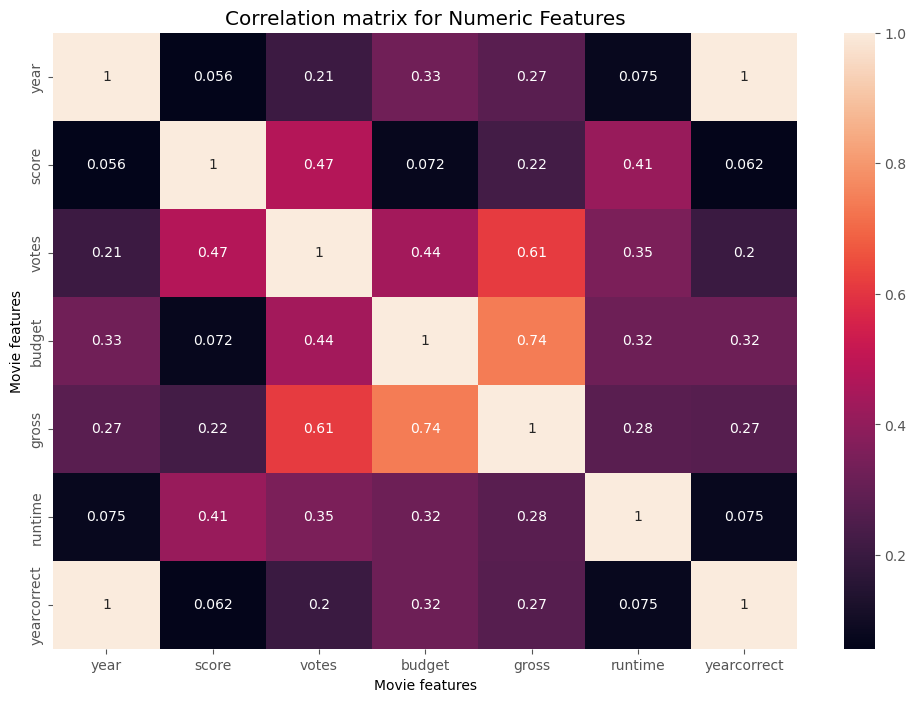

In [24]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [25]:
# Using factorize - this assigns a random numeric value for each unique categorical value

df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

name    rating     genre      year  released     score  \
name         1.000000  0.169808  0.028413  0.965461  0.966086 -0.020083   
rating       0.169808  1.000000 -0.116507  0.179456  0.171063  0.036114   
genre        0.028413 -0.116507  1.000000  0.031765  0.031251 -0.027402   
year         0.965461  0.179456  0.031765  1.000000  0.996490 -0.014594   
released     0.966086  0.171063  0.031251  0.996490  1.000000 -0.019486   
score       -0.020083  0.036114 -0.027402 -0.014594 -0.019486  1.000000   
votes        0.297305  0.097619 -0.009983  0.323916  0.313254 -0.041981   
director     0.725411  0.096014  0.036671  0.747785  0.750825 -0.006583   
writer       0.791872  0.128909  0.033975  0.812386  0.809858 -0.021538   
star         0.695124  0.115694  0.045497  0.719373  0.720076  0.015108   
country      0.098110 -0.004547 -0.003314  0.095073  0.096807  0.016567   
budget       0.288955  0.203698  0.020893  0.319135  0.309616 -0.005493   
gross        0.967925  0.172703  0.032033  0.996371  0.998490 -0.015744   
company      0.535369 -0.026286  0.015127  0.537731  0.546033 -0.008555   
runtime      0.048980  0.032265  0.000056  0.055864  0.049650  0.011831   
yearcorrect  0.921688  0.169681  0.031669  0.950610  0.945065 -0.012946   

                votes  director    writer      star   country    budget  \
name         0.297305  0.725411  0.791872  0.695124  0.098110  0.288955   
rating       0.097619  0.096014  0.128909  0.115694 -0.004547  0.203698   
genre       -0.009983  0.036671  0.033975  0.045497 -0.003314  0.020893   
year         0.323916  0.747785  0.812386  0.719373  0.095073  0.319135   
released     0.313254  0.750825  0.809858  0.720076  0.096807  0.309616   
score       -0.041981 -0.006583 -0.021538  0.015108  0.016567 -0.005493   
votes        1.000000  0.187909  0.225105  0.182043 -0.021562  0.359065   
director     0.187909  1.000000  0.717990  0.636705  0.095349  0.124051   
writer       0.225105  0.717990  1.000000  0.626647  0.098623  0.208088   
star         0.182043  0.636705  0.626647  1.000000  0.098071  0.138015   
country     -0.021562  0.095349  0.098623  0.098071  1.000000  0.016348   
budget       0.359065  0.124051  0.208088  0.138015  0.016348  1.000000   
gross        0.307248  0.751737  0.811356  0.720811  0.094820  0.305284   
company      0.007423  0.483737  0.477503  0.442307  0.153912 -0.053573   
runtime      0.126362 -0.026918  0.023123  0.033297  0.040813  0.134894   
yearcorrect  0.316065  0.708189  0.779672  0.684736  0.088955  0.303136   

                gross   company   runtime  yearcorrect  
name         0.967925  0.535369  0.048980     0.921688  
rating       0.172703 -0.026286  0.032265     0.169681  
genre        0.032033  0.015127  0.000056     0.031669  
year         0.996371  0.537731  0.055864     0.950610  
released     0.998490  0.546033  0.049650     0.945065  
score       -0.015744 -0.008555  0.011831    -0.012946  
votes        0.307248  0.007423  0.126362     0.316065  
director     0.751737  0.483737 -0.026918     0.708189  
writer       0.811356  0.477503  0.023123     0.779672  
star         0.720811  0.442307  0.033297     0.684736  
country      0.094820  0.153912  0.040813     0.088955  
budget       0.305284 -0.053573  0.134894     0.303136  
gross        1.000000  0.545924  0.047728     0.945958  
company      0.545924  1.000000 -0.010695     0.506753  
runtime      0.047728 -0.010695  1.000000     0.049194  
yearcorrect  0.945958  0.506753  0.049194     1.000000

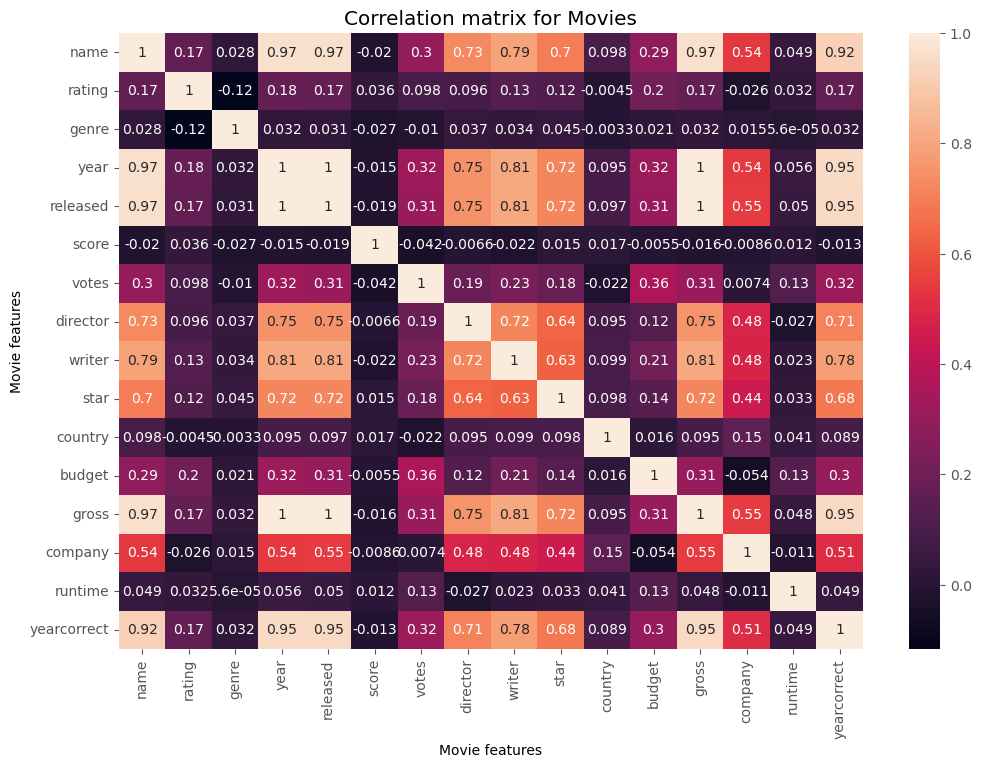

In [26]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [ ]:
2

In [27]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

name         name           1.000000
             rating         0.169808
             genre          0.028413
             year           0.965461
             released       0.966086
             score         -0.020083
             votes          0.297305
             director       0.725411
             writer         0.791872
             star           0.695124
             country        0.098110
             budget         0.288955
             gross          0.967925
             company        0.535369
             runtime        0.048980
             yearcorrect    0.921688
rating       name           0.169808
             rating         1.000000
             genre         -0.116507
             year           0.179456
             released       0.171063
             score          0.036114
             votes          0.097619
             director       0.096014
             writer         0.128909
             star           0.115694
             country       -0.004547
 

In [28]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

genre        rating        -0.116507
rating       genre         -0.116507
budget       company       -0.053573
company      budget        -0.053573
score        votes         -0.041981
votes        score         -0.041981
genre        score         -0.027402
score        genre         -0.027402
director     runtime       -0.026918
runtime      director      -0.026918
rating       company       -0.026286
company      rating        -0.026286
country      votes         -0.021562
votes        country       -0.021562
score        writer        -0.021538
writer       score         -0.021538
name         score         -0.020083
score        name          -0.020083
released     score         -0.019486
score        released      -0.019486
             gross         -0.015744
gross        score         -0.015744
score        year          -0.014594
year         score         -0.014594
score        yearcorrect   -0.012946
yearcorrect  score         -0.012946
company      runtime       -0.010695
r

In [29]:
# We can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

yearcorrect  company        0.506753
company      yearcorrect    0.506753
             name           0.535369
name         company        0.535369
company      year           0.537731
year         company        0.537731
company      gross          0.545924
gross        company        0.545924
released     company        0.546033
company      released       0.546033
star         writer         0.626647
writer       star           0.626647
star         director       0.636705
director     star           0.636705
yearcorrect  star           0.684736
star         yearcorrect    0.684736
             name           0.695124
name         star           0.695124
director     yearcorrect    0.708189
yearcorrect  director       0.708189
writer       director       0.717990
director     writer         0.717990
year         star           0.719373
star         year           0.719373
released     star           0.720076
star         released       0.720076
gross        star           0.720811
s

In [ ]:
# Votes and budget have the highest correaltion to gross earnings

# Company has low correlation

In [31]:
# Looking at the top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 


CompanyGrossSumSorted

company
Warner Bros.                 54610959970
Universal Pictures           51241105418
Columbia Pictures            42356430218
Paramount Pictures           40021704691
Twentieth Century Fox        39542573303
Walt Disney Pictures         35833650748
New Line Cinema              19612851164
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Dreamworks Pictures          11593807697
Touchstone Pictures          10664679494
Metro-Goldwyn-Mayer (MGM)     8937010092
Summit Entertainment          8318570396
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7243673721
Name: gross, dtype: int64

In [54]:


df.groupby(['company', 'year'])[["gross"]].sum()

gross
company year            
0       2003    44350926
1       2019   193457467
2       1996       10580
3       1996   129832389
        1999    87423861
4       1983    12232628
5       2003     4928883
6       2017    40656399
7       2014    58834384
8       2002      264349
9       2019   122810399
10      2007    22783978
11      2004    69424389
12      2020   111105497
13      2014    41296320
        2018    41142379
14      1990     5835247
15      1994     1702394
16      2002    23932055
17      2009    20458873
18      2007     7248490
        2008    28705178
        2014     5092129
19      2016      678150
        2018   197744377
20      1996    60209334
        1997    75812433
        2001    71186502
        2010      649626
        2013     3909596
        2014   161459297
        2015    36606743
        2019    22386555
21      1999     8408835
22      2017     5042014
23      2007     9669758
24      2001     4760014
25      1999   133949270
26      1986     7137502
        1989    37295445
        1995    15403436
        1999    34573780
        2000    27728118
        2004     1526951
27      2007    95802916
28      1999      206128
29      2000     3033646
30      1990    10005969
31      1990   201965915
32      2003     5141166
33      2002    80693537
34      1995     3734870
        1996       49620
        2002    14946150
35      1984     1455045
        1988      161004
        1992     1526697
        1993     1677807
36      2014    36869414
        2016    72551409
        2018    23650455
        2019    47967636
37      1983    35615609
        1984     2773433
        1986     9697739
38      1990      349618
39      2016    39712000
        2017    53939297
40      2005    12693645
41      1989       67878
42      1984    52066791
        1998     1263279
43      2013    17496820
44      2014    25419147
45      1980    21448782
        1981    25244626
46      2012     5277766
47      2000   224834564
        2005   194137091
        2006   178281554
48      1989     3169719
49      1987     3685862
50      2008    87066930
51      2013     1456675
52      2012   116471580
53      1988     4192440
54      2017    43980821
55      2018   117679066
56      1987    30902642
        1989     1877618
57      2012     1386088
58      2011     3242802
59      1983    17488564
60      1996      749741
        1997    12782749
61      1992     5378172
62      2019    38026103
63      2013    11806432
64      1997      127923
65      2013   181769347
66      1994      763847
67      1999     6552255
        2000    35547761
        2001     1198113
        2002   113758770
        2004    12313323
        2005   132768353
        2006    65664721
        2007   156835339
        2008    90200168
        2009   309208309
        2010   157107755
        2011   161043822
        2012    38390020
        2013   182178825
        2014   106435603
        2015   161690734
        2017   284935792
        2018    67450815
68      1992     9569275
        1993    46768542
        1995    23440188
69      2014    87835664
70      2012     7029095
71      2018    38755900
72      1987    14182492
        1988    13008928
        1989    16554699
        1991     1193062
73      1988    57041866
        1991    23202444
        2002    73839240
74      1997    14772788
75      2005    29612137
76      1989     4973285
77      2012     1544989
78      1997     2804473
        2001    12881605
        2002     6413915
        2003     1271244
79      1996     2671291
80      2013    27858103
81      1992    58124215
        1993    20915465
82      1995    10382407
83      1989     1919653
        1992    32100816
84      2015   542358331
85      2017    61621140
        2019     6750029
86      2015     2333684
87      1982     2032311
88      1984       95000
89      2002    12150301
90      2012    15950164
91      2000    20908467
92      2001     1846059
93      2000    34266564
94      2015      6

In [36]:

CompanyGrossSum = df.groupby(['company', 'year'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company','year'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company                year
Walt Disney Pictures   2019    5773131804
Marvel Studios         2018    4018631866
Universal Pictures     2015    3834354888
Twentieth Century Fox  2009    3793491246
Walt Disney Pictures   2017    3789382071
Paramount Pictures     2011    3565705182
Warner Bros.           2011    3223799224
Walt Disney Pictures   2010    3104474158
Paramount Pictures     2014    3071298586
Columbia Pictures      2006    2934631933
                       2019    2932757449
Marvel Studios         2019    2797501328
Warner Bros.           2018    2774168962
Columbia Pictures      2011    2738363306
Warner Bros.           2005    2688767210
Name: gross, dtype: int64

In [37]:

CompanyGrossSum = df.groupby(['company'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 54610959970
Universal Pictures           51241105418
Columbia Pictures            42356430218
Paramount Pictures           40021704691
Twentieth Century Fox        39542573303
Walt Disney Pictures         35833650748
New Line Cinema              19612851164
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Dreamworks Pictures          11593807697
Touchstone Pictures          10664679494
Metro-Goldwyn-Mayer (MGM)     8937010092
Summit Entertainment          8318570396
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7243673721
Name: gross, dtype: int64

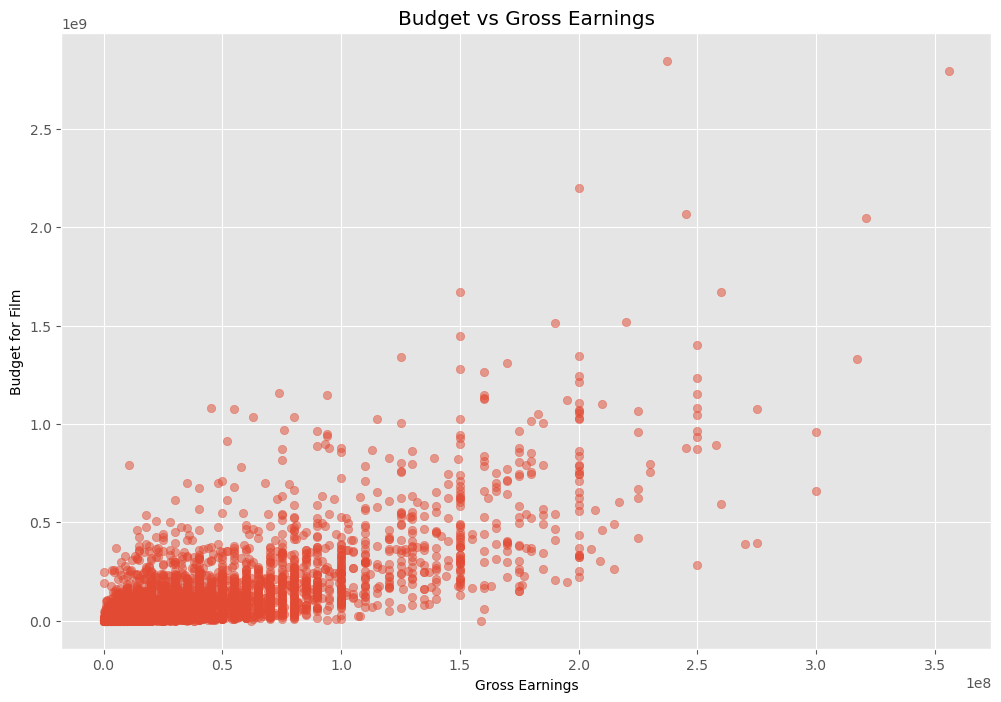

In [38]:
plt.scatter(x=df['budget'], y=df['gross'], alpha=0.5)
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

In [55]:
df.head()


name  rating  genre  year  released  score      votes  director  writer  \
0  4692       6      6  1980      1304    8.4   927000.0      1795    2832   
1  3929       6      1  1980      1127    5.8    65000.0      1578    1158   
2  3641       4      0  1980      1359    8.7  1200000.0       757    1818   
3   204       4      4  1980      1127    7.7   221000.0       889    1413   
4   732       6      4  1980      1170    7.3   108000.0       719     351   

   star  country    budget      gross  company  runtime  yearcorrect  Year  
0   699       46  19000000   46998772     1426    146.0         1980  1980  
1   214       47   4500000   58853106      452    104.0         1980  1980  
2  1157       47  18000000  538375067      945    124.0         1980  1980  
3  1474       47   3500000   83453539     1108     88.0         1980  1980  
4   271       47   6000000   39846344     1083     98.0         1980  1980

In [56]:
df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

name  rating  genre  year  released  score      votes  director  writer  \
0  4692       6      6  1980      1304    8.4   927000.0      1795    2832   
1  3929       6      1  1980      1127    5.8    65000.0      1578    1158   
2  3641       4      0  1980      1359    8.7  1200000.0       757    1818   
3   204       4      4  1980      1127    7.7   221000.0       889    1413   
4   732       6      4  1980      1170    7.3   108000.0       719     351   

   star  country    budget      gross  company  runtime  yearcorrect  Year  
0   699       46  19000000   46998772     1426    146.0         1980  1980  
1   214       47   4500000   58853106      452    104.0         1980  1980  
2  1157       47  18000000  538375067      945    124.0         1980  1980  
3  1474       47   3500000   83453539     1108     88.0         1980  1980  
4   271       47   6000000   39846344     1083     98.0         1980  1980

In [41]:
df_numerized.corr(method='pearson')

name    rating     genre      year  released     score  \
name         1.000000 -0.029234  0.010996  0.025542 -0.006152  0.014450   
rating      -0.029234  1.000000  0.147796  0.019499  0.018083  0.065983   
genre        0.010996  0.147796  1.000000 -0.073167  0.022142  0.035106   
year         0.025542  0.019499 -0.073167  1.000000 -0.001740  0.056386   
released    -0.006152  0.018083  0.022142 -0.001740  1.000000  0.045874   
score        0.014450  0.065983  0.035106  0.056386  0.045874  1.000000   
votes        0.012615  0.006031 -0.135990  0.206021  0.028833  0.474256   
director     0.015246  0.014656 -0.008553 -0.038354  0.002308  0.005413   
writer       0.012880 -0.003149  0.017578 -0.025908  0.008072  0.012843   
star        -0.006882  0.009196  0.003341 -0.032157  0.015706  0.007296   
country     -0.025490  0.008230 -0.009164 -0.066748 -0.017228 -0.043051   
budget       0.023392 -0.203946 -0.368523  0.327722  0.019952  0.072001   
gross        0.005639 -0.181906 -0.244101  0.274321  0.008501  0.222556   
company      0.021697 -0.092357 -0.071334 -0.014333 -0.002407  0.020656   
runtime      0.010850  0.140792 -0.059237  0.075077  0.008975  0.414068   
yearcorrect  0.025542  0.022021 -0.069147  0.998726 -0.005989  0.061923   
Year         0.025542  0.022021 -0.069147  0.998726 -0.005989  0.061923   

                votes  director    writer      star   country    budget  \
name         0.012615  0.015246  0.012880 -0.006882 -0.025490  0.023392   
rating       0.006031  0.014656 -0.003149  0.009196  0.008230 -0.203946   
genre       -0.135990 -0.008553  0.017578  0.003341 -0.009164 -0.368523   
year         0.206021 -0.038354 -0.025908 -0.032157 -0.066748  0.327722   
released     0.028833  0.002308  0.008072  0.015706 -0.017228  0.019952   
score        0.474256  0.005413  0.012843  0.007296 -0.043051  0.072001   
votes        1.000000 -0.010376 -0.005316 -0.017638  0.041551  0.439675   
director    -0.010376  1.000000  0.261735  0.036593  0.011133 -0.009662   
writer      -0.005316  0.261735  1.000000  0.018520  0.022488 -0.039466   
star        -0.017638  0.036593  0.018520  1.000000 -0.009990 -0.021473   
country      0.041551  0.011133  0.022488 -0.009990  1.000000  0.052977   
budget       0.439675 -0.009662 -0.039466 -0.021473  0.052977  1.000000   
gross        0.614751 -0.029560 -0.035885 -0.000004  0.060078  0.740247   
company      0.118470 -0.008223 -0.003697  0.014082  0.048569  0.170235   
runtime      0.352303  0.017433 -0.017561  0.010108 -0.034477  0.318695   
yearcorrect  0.203098 -0.037371 -0.025495 -0.032687 -0.073569  0.320312   
Year         0.203098 -0.037371 -0.025495 -0.032687 -0.073569  0.320312   

                gross   company   runtime  yearcorrect      Year  
name         0.005639  0.021697  0.010850     0.025542  0.025542  
rating      -0.181906 -0.092357  0.140792     0.022021  0.022021  
genre       -0.244101 -0.071334 -0.059237    -0.069147 -0.069147  
year         0.274321 -0.014333  0.075077     0.998726  0.998726  
released     0.008501 -0.002407  0.008975    -0.005989 -0.005989  
score        0.222556  0.020656  0.414068     0.061923  0.061923  
votes        0.614751  0.118470  0.352303     0.203098  0.203098  
director    -0.029560 -0.008223  0.017433    -0.037371 -0.037371  
writer      -0.035885 -0.003697 -0.017561    -0.025495 -0.025495  
star        -0.000004  0.014082  0.010108    -0.032687 -0.032687  
country      0.060078  0.048569 -0.034477    -0.073569 -0.073569  
budget       0.740247  0.170235  0.318695     0.320312  0.320312  
gross        1.000000  0.149553  0.275796     0.268721  0.268721  
company      0.149553  1.000000  0.037585    -0.018806 -0.018806  
runtime      0.275796  0.037585  1.000000     0.075294  0.075294  
yearcorrect  0.268721 -0.018806  0.075294     1.000000  1.000000  
Year         0.268721 -0.018806  0.075294     1.000000  1.000000

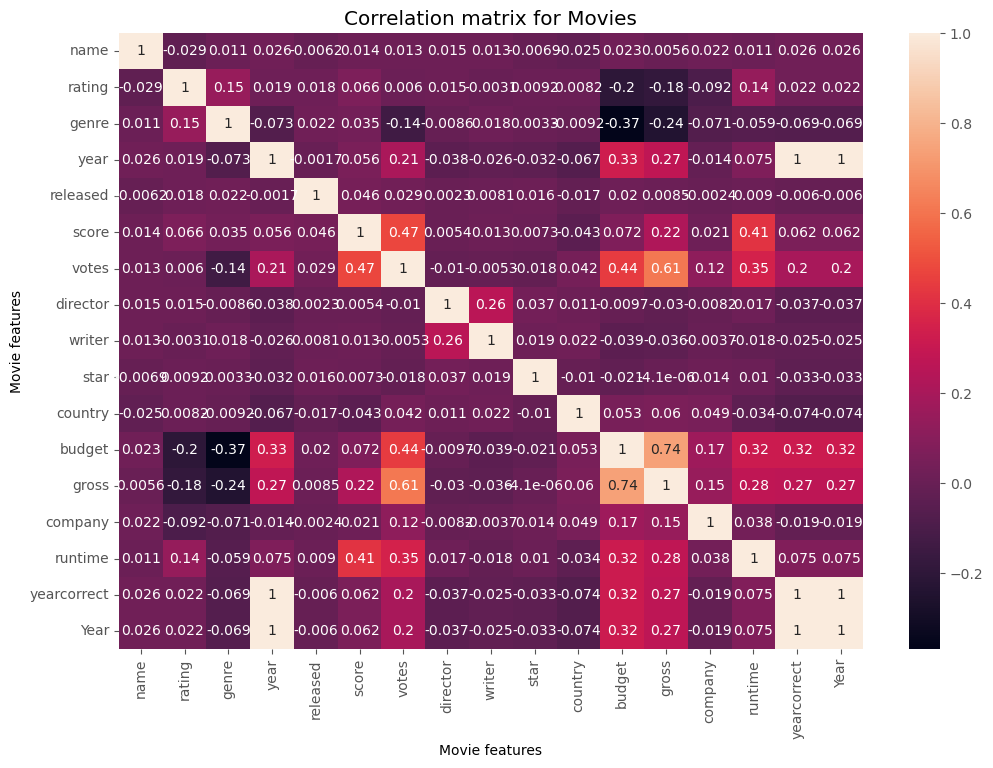

In [42]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()